# Classes and Subclasses
Object-Oriented Programming (OOP) is a common programming model that involves the modeling of "objects" that have attributes and methods to mimic real-world entities.
## Classes
Classes are blueprints for creating objects. They provide a means of bundling data and functionality together. Creating a new class defines a new type of object, and this object can have numerous instances, with each instance having attributes for maintaining its state and methods for modifying its state.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def find_discharge(current, resistance, time_hours):
    """Find battery discharge voltage over time."""
    return max(0, 12 - current * resistance * time_hours)  # Assume start at 12V

class Battery(object):
    """General Battery Class."""
    
    def __init__(self, capacity_Ah, internal_resistance_ohm, hours):
        self.capacity = capacity_Ah
        self.resistance = internal_resistance_ohm
        self.hours = hours
        self.voltage = [12]  # start at 12V
        self.current_draw = self.capacity / 10  # Assume 10 hour discharge rate
        self.legend = None

    def discharge(self):
        """Simulate discharge over time."""
        for h in range(1, self.hours + 1):
            v = find_discharge(self.current_draw, self.resistance, h)
            self.voltage.append(v)

    def plot_voltage(self, style):
        plt.plot(range(len(self.voltage)), self.voltage, style, label=self.legend)


## Subclass
Subclasses are classes modeled around existing classes, establishing a parent-child relationship between the class and the subclass. Subclasses are used when there are different objects with the same attributes and methods, allowing them to be modeled around the parent class to improve maintainability.


In [2]:
class LeadAcidBattery(Battery):
    def __init__(self, capacity_Ah, hours):
        super().__init__(capacity_Ah, 0.05, hours)  # Higher internal resistance
        self.legend = 'Lead Acid'

class LithiumIonBattery(Battery):
    def __init__(self, capacity_Ah, hours):
        super().__init__(capacity_Ah, 0.01, hours)  # Lower resistance
        self.legend = 'Lithium Ion'

class NiMHBattery(Battery):
    def __init__(self, capacity_Ah, hours):
        super().__init__(capacity_Ah, 0.02, hours)
        self.legend = 'Nickel Metal Hydride'


The use of classes enhances code reusability, improves flexibility, and makes programs easier to maintain, debug, and understand. This is what makes OOP faster and cheaper compared to other programming models, and why it is preferred in many real-world applications.

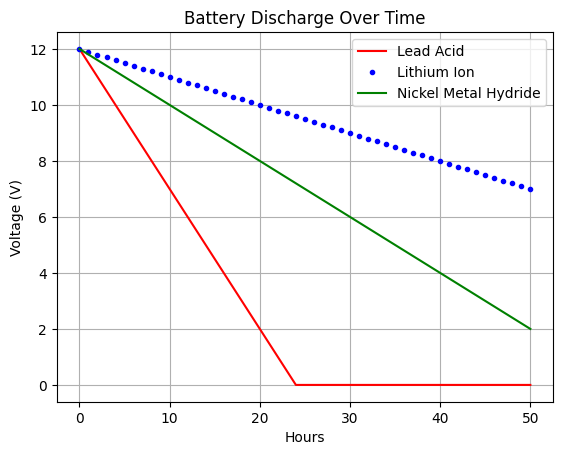

In [3]:
def plot_batteries(batteries):
    styles = ['r', 'b.', 'g']
    for i, battery in enumerate(batteries):
        battery.discharge()
        battery.plot_voltage(styles[i % len(styles)])

    plt.title("Battery Discharge Over Time")
    plt.xlabel("Hours")
    plt.ylabel("Voltage (V)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example use
lead = LeadAcidBattery(100, 50)
lithium = LithiumIonBattery(100, 50)
nimh = NiMHBattery(100, 50)

plot_batteries([lead, lithium, nimh])
